In [1]:
import allow_local_imports

In [2]:
from lib.minority_game import MinorityGame, MinorityGameIndividualAgents
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator, GumbelDistributionMemoryGenerator, NormalDistributionMemoryGenerator
from lib.plots import default_plot
from lib.error import MinorityGameError

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
import seaborn as sns
from numpy.random import default_rng
from numpy.lib.arraysetops import isin
from typing import List
import pandas as pd
from numpy.lib.histograms import histogram


In [4]:
class BaseMemoryGenerator:
    """
    Abstract class that should be subclassed when implementing
    a new memory generator.
    """
    def __init__(self, m, k):
        self.m = m
        self.k = k # the scale

    def generate(self, size):
        raise NotImplementedError

class NormalDistributionMemoryGenerator(BaseMemoryGenerator):
    """
    Samples memory from a distribution
    (Memories are distributed by normal distribution.)
    """

    def generate(self, size):
        rng = default_rng()
        return rng.normal(self.m, 2, size).astype(int)+1
class GumbelDistributionMemoryGenerator(BaseMemoryGenerator):
    """
    Samples memory from a gumbel distribution.
    (Skwed distribution of memory)
    """

    def generate(self, size):
        rng = default_rng()
        return rng.gumbel(self.m, self.k, size).astype(int)+1   

## Generate a histogram of the gumbel and normal distributions

In [64]:
# a possible distribution 
rng = default_rng()
m = 7
n_agents = 101

In [29]:
gumbel_dist = rng.gumbel(m, 2, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
side_g, count_g = np.unique(gumbel_dist, return_counts=True)
normal_dist = rng.gumbel(m, 2, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
side_n, count_n = np.unique(normal_dist, return_counts=True)

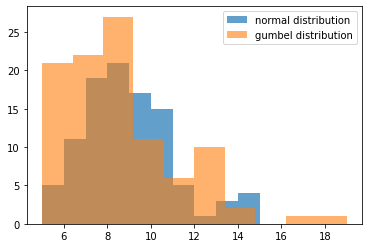

In [30]:
# plotting first histogram
plt.hist(normal_dist, label='normal distribution', alpha=.7)
  
# plotting second histogram
plt.hist(gumbel_dist, label='gumbel distribution', alpha=0.6)
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

## A loop over different centering values

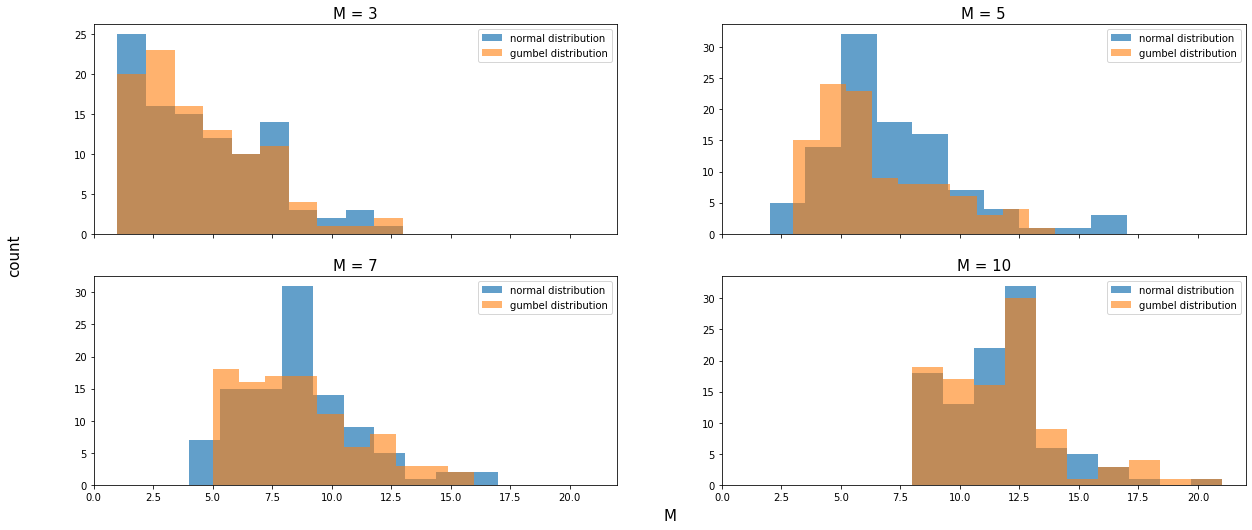

In [96]:
# a possible distribution 
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=0.9),sharex = True,
                       figsize=(20, 8))

for i, m in enumerate([3,5,7,10]):
    i += 1
    plt.subplot(2,2,i)
    rng = default_rng()
    n_agents = 101

    gumbel_dist = rng.gumbel(m, 2, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
    side_g, count_g = np.unique(gumbel_dist, return_counts=True)
    normal_dist = rng.gumbel(m, 2, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
    side_n, count_n = np.unique(normal_dist, return_counts=True)
    plt.title('M = '+ str(m), size = 15)

    
    # plotting first histogram
    plt.hist(normal_dist, label='normal distribution', alpha=.7)

    # plotting second histogram
    plt.hist(gumbel_dist, label='gumbel distribution', alpha=0.6)
    plt.legend()

fig.text(0.5, 0.04, 'M', ha='center', size = 15)
fig.text(0.04, 0.5, 'count', va='center', rotation='vertical', size = 15)
plt.savefig('out/distrubutionHistograms_centeringValues.png', dpi=300, bbox_inches='tight')

plt.show()

## For different SD

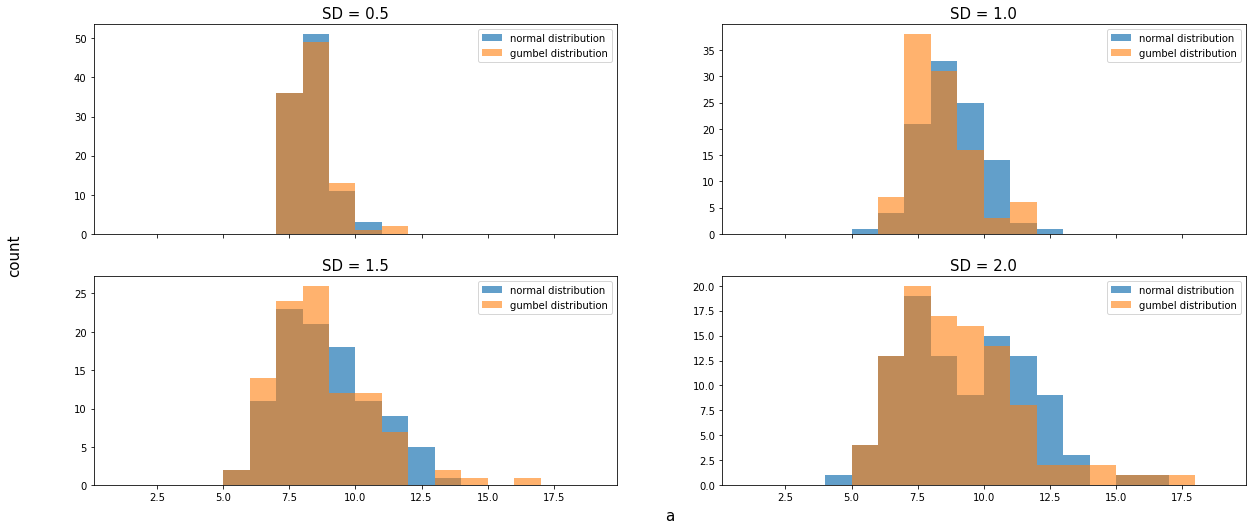

In [117]:
# a possible distribution 
m = 7
bins = list(range(1,20))
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=0.9),sharex = True,
                       figsize=(20, 8))

for i, a in enumerate([0.5,1.0,1.5,2.0]):
    i += 1
    plt.subplot(2,2,i)
    rng = default_rng()
    n_agents = 101

    gumbel_dist = rng.gumbel(m, a, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
    side_g, count_g = np.unique(gumbel_dist, return_counts=True)
    normal_dist = rng.gumbel(m, a, n_agents).astype(int)+1 # m is the mode , 1 is the scale (how narrow it is), n_agents is the size
    side_n, count_n = np.unique(normal_dist, return_counts=True)
    plt.title('SD = '+ str(a), size = 15)
    
    # plotting first histogram
    plt.hist(normal_dist, label='normal distribution', alpha=.7, bins = bins)

    # plotting second histogram
    plt.hist(gumbel_dist, label='gumbel distribution', alpha=0.6, bins = bins)
    plt.legend()

fig.text(0.5, 0.04, 'a', ha='center', size = 15)
fig.text(0.04, 0.5, 'count', va='center', rotation='vertical', size = 15)
plt.savefig('out/distrubutionHistograms_sdValues.png', dpi=300, bbox_inches='tight')

plt.show()